# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the data into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print("trainFaces :", trainFaces.shape, "\ntrainLabels :", trainLabels.shape)

X_train = trainFaces.reshape(trainFaces.shape[0], -1)
print("X_train :", X_train.shape)
X_test = testFaces.reshape(testFaces.shape[0], -1)
print("X_test :", X_test.shape)

trainFaces : (360, 112, 92) 
trainLabels : (360,)
X_train : (360, 10304)
X_test : (40, 10304)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [3]:
def principalComponentAnalysis(X):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """
    # your code here
    #: Take mean of X and center the points at origin
    X_mean = np.mean(X, axis=0)
    print("X_mean :", X_mean.shape)
    X_centered = X - X_mean
    print("X_centered :", X_centered.shape)
    #: Covariance matrix of centered points
    covariance_mat = np.cov(X_centered, rowvar=False)
    print("covariance_mat :", covariance_mat.shape)
    #: All eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_mat)

    return eigen_values, eigen_vectors

eigen_values, eigen_vectors = principalComponentAnalysis(X_train)

X_mean : (10304,)
X_centered : (360, 10304)
covariance_mat : (10304, 10304)


In [4]:
print("eigen_vectors :", eigen_vectors.shape)
print("eigen_values :", eigen_values.shape)

#: sorting eigen vectors w.r.t eigen values and taking top 100 eigen vectors (n_factor: 100)
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:, sorted_indices]
sorted_eigenvectors = sorted_eigenvectors.T
sorted_eigenvectors_100 = sorted_eigenvectors[:100, :]

print("sorted_eigenvectors :", sorted_eigenvectors.shape)
print("sorted_eigenvectors_100 :", sorted_eigenvectors_100.shape)

eigen_vectors : (10304, 10304)
eigen_values : (10304,)
sorted_eigenvectors : (10304, 10304)
sorted_eigenvectors_100 : (100, 10304)


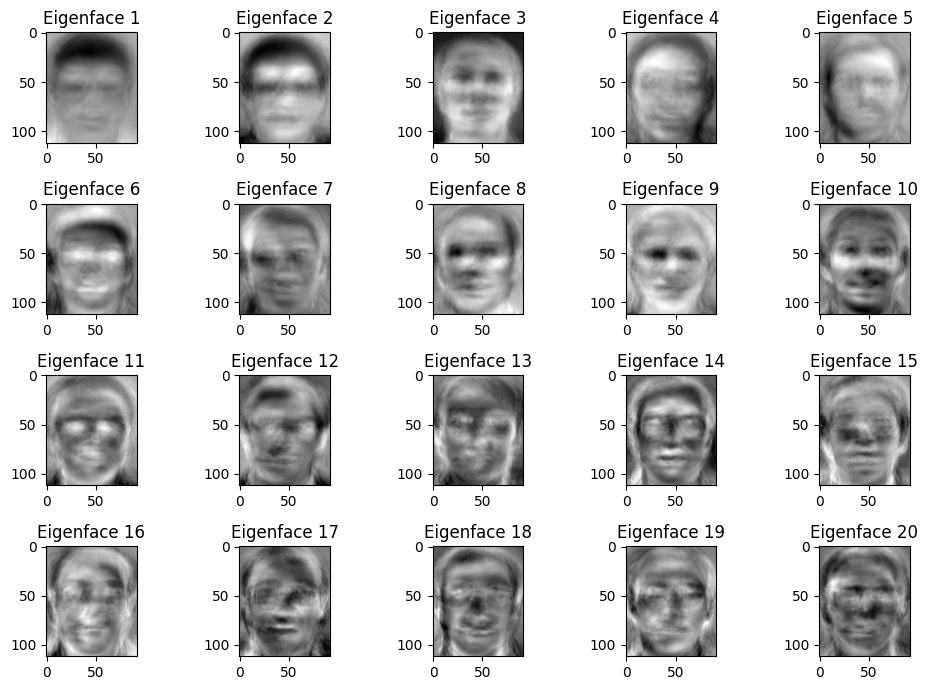

In [5]:
# plot the eigen faces
%matplotlib inline
fig, axes = plt.subplots(4, 5, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(sorted_eigenvectors[i,:].reshape(trainFaces.shape[1], trainFaces.shape[2]), cmap='gist_gray')
    ax.set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [6]:
X_mean = np.mean(X_train, axis=0)

def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """
    y = np.dot( testFace - meanFace, eigenFaces.T)
    return np.dot(y, eigenFaces) + meanFace

faces_reconstuct = imageReconstruction(X_train, sorted_eigenvectors_100, X_mean)


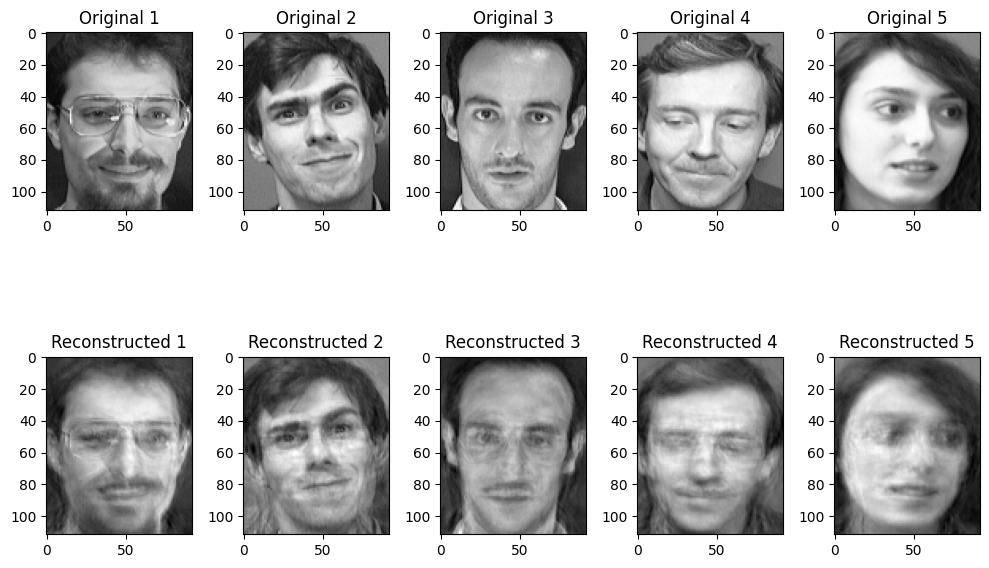

In [7]:
# plot recontructions here
%matplotlib inline
#: Plotting reconstucted images for n_factor = 100
fig, axes = plt.subplots(2, 5, figsize=(10, 7))
for i in range(5):
    axes[0, i].imshow(X_train[i].reshape(trainFaces.shape[1], trainFaces.shape[2]), cmap='gist_gray')
    axes[0, i].set_title(f'Original {i+1}')
    axes[1, i].imshow(faces_reconstuct[i].reshape(trainFaces.shape[1], trainFaces.shape[2]), cmap='gist_gray')
    axes[1, i].set_title(f'Reconstructed {i+1}')
plt.tight_layout()
plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

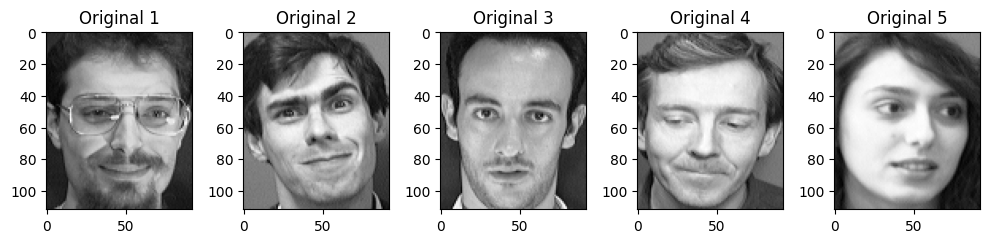

N_factor : 5


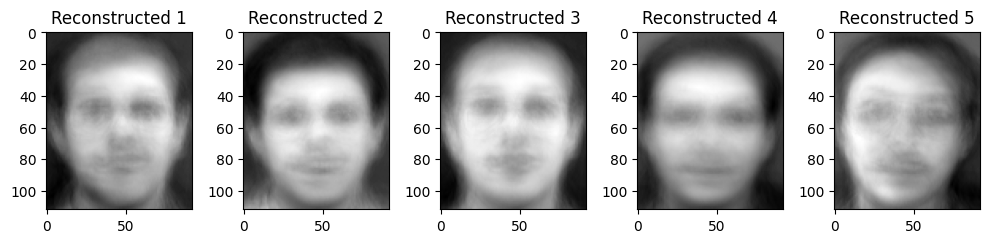

N_factor : 10


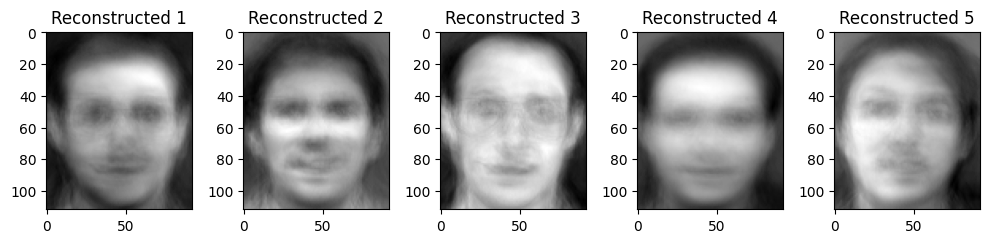

N_factor : 50


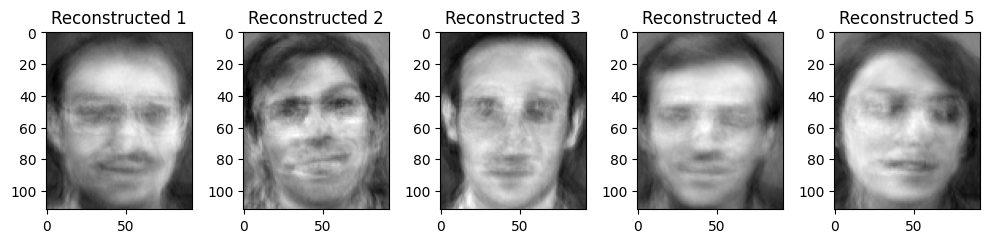

N_factor : 100


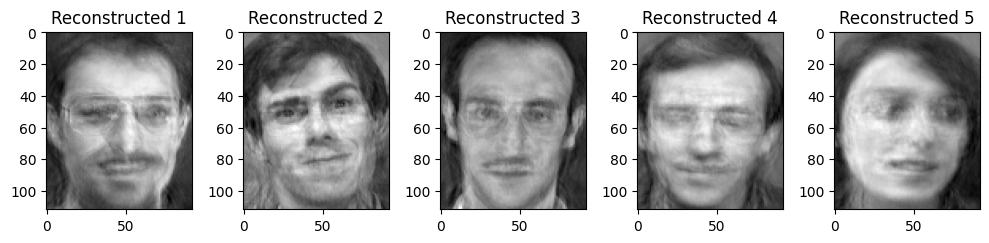

N_factor : 250


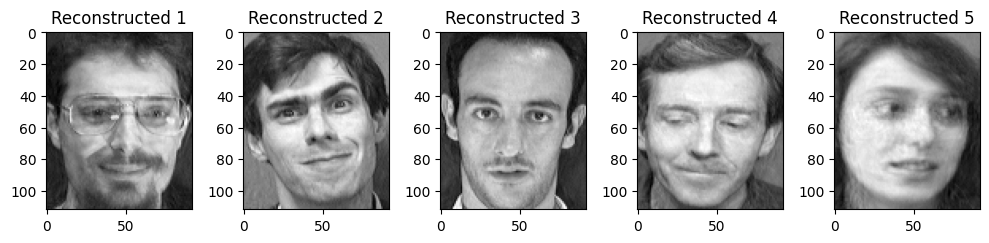

N_factor : 500


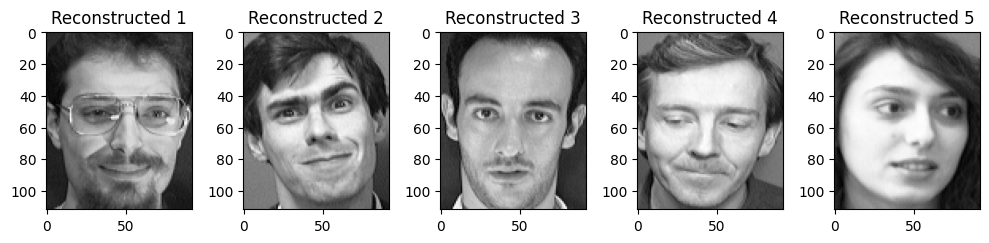

In [8]:
%matplotlib inline

def displayNfactors(n_factors):
    #: for all n_factors recontructing images and appending all in list which is returned by this function
    faces_reconstuct_list = []
    for i in n_factors:
        faces_reconstuct_list.append(imageReconstruction(X_train, sorted_eigenvectors[:i, :], X_mean))

    return faces_reconstuct_list

#: Defining list of n_factors
n_factors = [5, 10, 50, 100, 250, 500]
faces_reconstuct_list = displayNfactors(n_factors)

#: Plotting original images
fig, axes = plt.subplots(1, 5, figsize=(10, 7))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(trainFaces.shape[1], trainFaces.shape[2]), cmap='gist_gray')
    axes[i].set_title(f'Original {i+1}')
plt.tight_layout()
plt.show()

#: Plotting re-constructed images for all n_factors
for j in range(len(faces_reconstuct_list)):
    print("N_factor :", n_factors[j])
    fig, axes = plt.subplots(1, 5, figsize=(10, 7))
    for i in range(5):
        axes[i].imshow(faces_reconstuct_list[j][i].reshape(trainFaces.shape[1], trainFaces.shape[2]), cmap='gist_gray')
        axes[i].set_title(f'Reconstructed {i+1}')
    plt.tight_layout()
    plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [57]:
components = [3,5,10,20,30,40,50]
# components = [3]
from sklearn.metrics import accuracy_score
accuracies = []
mse = []
log_mse = []

for numComponents in components:
    top_eigen_vec = sorted_eigenvectors[:numComponents,:]

    #: normalizing train and test data
    X_train_mean = np.mean(X_train, axis = 0)
    X_train_normalized = X_train - X_train_mean
    X_test_mean = np.mean(X_test, axis = 0)
    X_test_normalized = X_test - X_test_mean

    #: Dot product with max_n eigen vectors
    train_vec = np.dot(X_train_normalized , top_eigen_vec.T)
    test_vec = np.dot(X_test_normalized, top_eigen_vec.T)

    #: Predicting the labels and storing it in predicted_labels list
    predicted_labels = []
    for test_image in test_vec:
        distances = np.linalg.norm(train_vec - test_image, axis=1)
        predicted_label = trainLabels[np.argmin(distances)]
        predicted_labels.append(predicted_label)

    #: Calculating accuracy, MSE, and log MSE
    accuracy = accuracy_score(testLabels, predicted_labels)
    mse_val  = np.mean((X_test_normalized - np.dot(test_vec, top_eigen_vec))**2)
    mse_log_val = np.log(mse_val)
    
    # import sklearn
    # term1 = X_test_normalized
    # term2 = np.dot(test_vec, top_eigen_vec)
    # sklearn.metrics.mean_squared_log_error(term1, term2)
    # for i in range(len(term1)):
    #     for j in range(len(term1[i])):
    #         if j == -1:
    #             term1[i][j] = 0

    # for i in range(len(term2)):
    #     for j in range(len(term2[i])):
    #         if j == -1:
    #             term2[i][j] = 0

    # cou = 0

    # mse_log_val = np.mean((np.log(term1 + 1 / term2 + 1))**2)

    
    accuracies.append(accuracy)
    mse.append(mse_val)
    log_mse.append(mse_log_val)

print(accuracies)
print(mse)
print(log_mse)

[0.625, 0.8, 0.925, 0.95, 0.975, 1.0, 1.0]
[965.8065282845401, 825.2262850988654, 652.9459911976022, 521.1957587316052, 457.9568959963553, 411.98467391961697, 382.5017511809658]
[6.8729635328746, 6.715657633693758, 6.48149441712326, 6.256125707711067, 6.126775066140151, 6.020986149433387, 5.946733231507001]


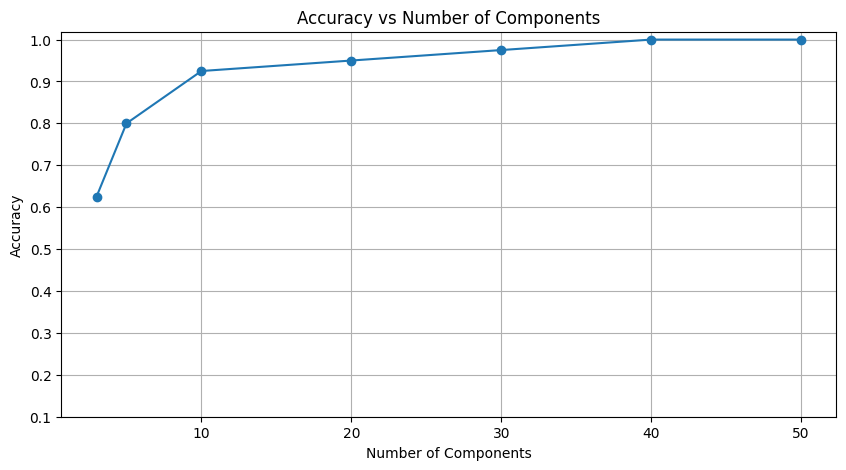

In [58]:
# your code here
plt.figure(figsize=(10, 5))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Mean Square Error

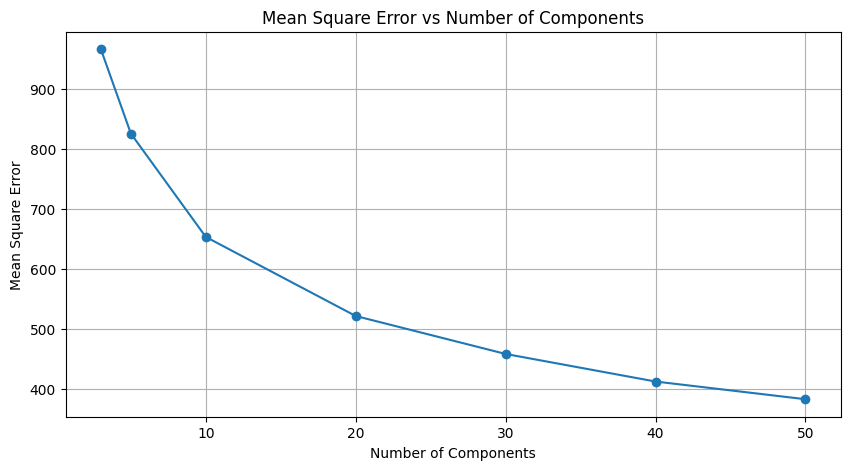

In [59]:
# your code here
plt.figure(figsize=(10, 5))
plt.plot(components, mse, marker='o')
plt.title('Mean Square Error vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

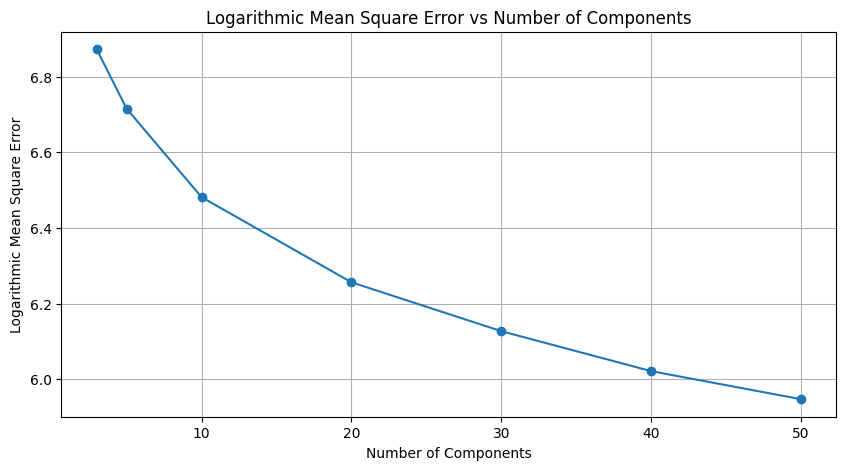

In [60]:
# your code here
plt.figure(figsize=(10, 5))
plt.plot(components, log_mse, marker='o')

plt.title('Logarithmic Mean Square Error vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Logarithmic Mean Square Error')
plt.grid(True)
plt.show()